<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Starting-Parameters" data-toc-modified-id="Starting-Parameters-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Starting Parameters</a></span></li><li><span><a href="#Defining-Parameter-Space" data-toc-modified-id="Defining-Parameter-Space-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Defining Parameter Space</a></span></li><li><span><a href="#Simulations" data-toc-modified-id="Simulations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simulations</a></span></li><li><span><a href="#Heatmaps" data-toc-modified-id="Heatmaps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Heatmaps</a></span></li><li><span><a href="#Plot-Best-Curve" data-toc-modified-id="Plot-Best-Curve-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot Best Curve</a></span></li><li><span><a href="#Sandbox" data-toc-modified-id="Sandbox-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sandbox</a></span></li></ul></div>

In [ ]:
from numpy import isnan, nan_to_num, zeros_like, zeros, array, arange, meshgrid, around, nan
from numpy import where, amax
import seaborn as sb
import matplotlib.pyplot as plt
import Functions as F

## for graphs in my darkmode
sb.set(context='paper',style='whitegrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

start date: 14/07/2020

new attempt at building the optimisation

# Starting Parameters

In [3]:
# Parameters
norm_const = F.Fun_Resp(1, 10**6, "2D")* (60 * 60 * 24)# /s -> /min -> /hour -> /day 

params = {"alpha" : 10, "epsilon" : 0.7, # epsilon from peters book
          "norm_const" : norm_const, "meta_prop" : 0.1, "meta_exp" : 1,
          "c" : 0, "rho" : 0,
          "Xr" : 1, "amp" : 0.5, "period" : 365, "dimensionality" : "2D"}

m0 = 10**-2
R0 = 0
time = 1000

# Defining Parameter Space
Defining the vectors to iterate through for `rho` and `c` values.

In [ ]:
# Resolution of parameter space search
resolution = 0.1
# highest value for c and rho, resolution added since `arange` stope before highest value given
param_space_max = 2 #+ resolution 

# c and rho vectors
c_vec = arange(0, param_space_max, resolution)
rho_vec = arange(0, param_space_max, resolution)
# c and rho arrays
c_array, rho_array = meshgrid(c_vec, rho_vec) # rho changes by row and c by col

# arrays to store results
repro_result_array = zeros_like(c_array) # may have issues if `c` and `rho` arrays are not the same size
mass_result_array = zeros_like(c_array)

# Simulations

In [ ]:
# take some key param vals for neatness
alpha = params["alpha"]

for i, rho in enumerate(rho_vec):
    params["rho"] = rho
    
    for j, c in enumerate(c_vec):
        params["c"] = c
        result = F.dmdt_integrate(m0, R0, time, params)
        mass = result[:,0]
        repro = result[:,1]
        
        # check for shrinking
        if mass[-1] < mass[alpha] or mass[0] > mass[-1] or isnan(mass[-1]):
            mass = zeros_like(mass)
            repro = zeros_like(repro)
        
        repro_result_array[i,j] = repro[-1]
        mass_result_array[i,j] = mass[-1]
        

In [ ]:
# find max
ind = where(repro_result_array == amax(repro_result_array))
# ind = F.find_max(repro_result_array) #returns first largest value
i, j = ind


In [ ]:
ind

# Heatmaps

In [ ]:
plt.figure()
sb.heatmap(repro_result_array,
            xticklabels = around(c_vec, decimals=2), 
            yticklabels= around(rho_vec, decimals=2)).invert_yaxis()
#scale circle for highest value with resolution of heatmap
offset = resolution *5
size = resolution * 2000
# circle highest value
plt.scatter(j+offset, i+offset, s=size, linewidth=3, facecolors='none', edgecolors='c' )

plt.ylabel("rho")
plt.xlabel("c")
plt.title("Reproductive Output (kg)")

plt.figure()
sb.heatmap(mass_result_array,
            xticklabels = around(c_vec, decimals=2), 
            yticklabels = around(rho_vec, decimals=2)).invert_yaxis()

# circle highest value
plt.scatter(j+offset, i+offset, s=size, linewidth=3, facecolors='none', edgecolors='c' )

plt.ylabel("rho")
plt.xlabel("c")
plt.title("Mass (kg)")

In [ ]:
# debugging for multiple best values
# c_opt = 1.4
# rho_opt = 0.8

repro_result_array[ind]

In [ ]:
rho_opt = float(rho_vec[i])
c_opt = float(c_vec[j])
print("c_opt:", c_opt)
print("rho_opt:",rho_opt)
print("highest reproductive output:", repro_result_array[ind])
print("mass output for optimum reproduction:", mass_result_array[ind])

# Plot Best Curve

In [ ]:
params["c"] = c_opt
params["rho"] =rho_opt

time=1000

mR = F.dmdt_integrate(m0, R0, time, params) 

# unpack results
m = mR[:,0]
repro = mR[:,1]

t = arange(0, time, 1)

plt.figure()
plt.plot(t, m, label="Mass") #change dimensions from col to row
plt.plot(t, repro, label="Reproductive Output") 
plt.xlabel("Time (days)")
plt.ylabel("Mass (kg)")

plt.legend()
plt.show()

In [ ]:
break # to stop notebook before sandbox

# Sandbox

In [1]:
from numpy import isnan, nan_to_num, zeros_like, zeros, array, arange, meshgrid, around, nan
from numpy import where, amax
import seaborn as sb
import matplotlib.pyplot as plt
import Functions as F

## for graphs in my darkmode
sb.set(context='paper',style='whitegrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

/home/donal/Documents/Project/code/Functions.py:219: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:244: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * tk0


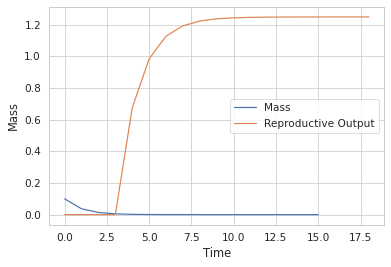

array([[1.00000000e-01, 0.00000000e+00],
       [3.67879540e-02, 0.00000000e+00],
       [1.35335300e-02, 0.00000000e+00],
       [4.97872006e-03, 3.27393989e-10],
       [1.83156861e-03, 6.74099114e-01],
       [6.73796548e-04, 9.84141959e-01],
       [2.47875809e-04, 1.12674201e+00],
       [9.11884303e-05, 1.19232900e+00],
       [3.35462834e-05, 1.22249485e+00],
       [1.23409949e-05, 1.23636924e+00],
       [4.53994756e-06, 1.24275058e+00],
       [1.66982878e-06, 1.24568559e+00],
       [6.14594987e-07, 1.24703552e+00],
       [2.27204681e-07, 1.24765640e+00],
       [8.48625728e-08, 1.24794196e+00],
       [2.86618214e-08, 1.24807330e+00],
       [           nan, 1.24813371e+00],
       [           nan, 1.24816150e+00],
       [           nan, 1.24817428e+00],
       [           nan,            nan],
       [           nan,            nan],
       [           nan,            nan],
       [           nan,            nan],
       [           nan,            nan],
       [        

In [4]:

params = {"alpha" : 3, "epsilon" : 0.7, # epsilon from peters book
          "norm_const" : norm_const, "meta_prop" : 0.1, "meta_exp" : 1,
          "c" : 0.1, "rho" : 0,
          "Xr" : 1, "amp" : 0.5, "period" : 365, "dimensionality" : "2D"}
# Parameters
m0 = 0.1
R0 = 0
time = 100

F.plot_supply(m0, R0, time, params)


Text(0.5, 0, 'time')

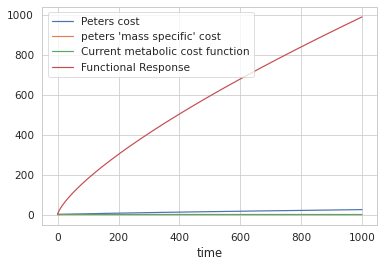

In [5]:
amount = 10**3
t = arange(0,amount, 1)
mass = arange(0.1, amount, 1)
peters = 0.14*mass**0.751
peters_specific = 0.14*mass**-0.249
plt.plot(t, peters, label="Peters cost")
plt.plot(t, peters_specific, label = "peters 'mass specific' cost")
plt.plot(t, F.metabolic_cost(mass), label="Current metabolic cost function")
plt.plot(params["epsilon"] * F.Fun_Resp(mass, Xr=params["Xr"], dimensionality="2D")*24*60*60, 
         label="Functional Response")
plt.legend()
plt.xlabel("time")